# Install the required packages

In [1]:
!pip3 install torch torchvision torchaudio --index-url https: // download.pytorch.org / whl / cpu
!pip3 install numpy
!pip3 install matplotlib

ERROR: Directory '//' is not installable. Neither 'setup.py' nor 'pyproject.toml' found.

[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: pip install --upgrade pip


# Import the required packages

In [2]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from torchvision import datasets, transforms

# Define the transformations to prepare the data

In [3]:
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,)),
                                ])

1. ```transforms.ToTensor()``` converts the image to a tensor
2. ```transforms.Normalize((0.5,), (0.5,))``` normalizes the image

# Download the dataset

In [4]:
!mkdir data
!mkdir data / train
!mkdir data / test

trainset = datasets.MNIST('data/train', download=True, train=True, transform=transform)

valset = datasets.MNIST('data/test', download=True, train=False, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)

mkdir: cannot create directory ‘data’: File exists
mkdir: cannot create directory ‘data’: File exists
mkdir: cannot create directory ‘/’: File exists
mkdir: cannot create directory ‘data’: File exists
mkdir: cannot create directory ‘/’: File exists


# Analyze the dataset

In [5]:
dataiter = iter(trainloader)
images, labels = next(dataiter)

print(images.shape)
print(labels.shape)

torch.Size([64, 1, 28, 28])
torch.Size([64])


The batch size is 64 and the image size is 28x28 and the number of channels is 1 (grayscale)
The labels are the corresponding numbers for the images

# Load the model

In [6]:
model = torch.load("models/mnist_model.pt")

# Test the model on a single image

Predicted Digit = 8


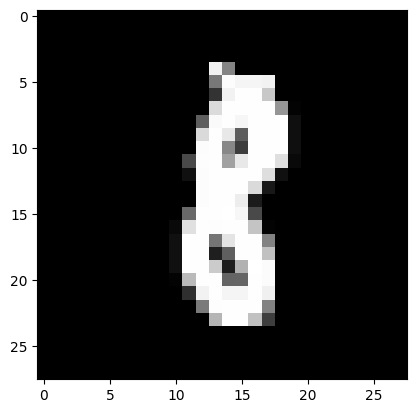

In [7]:
img = images[0]
img = img.view(1, 784)
with torch.no_grad():
    logps = model(img)

ps = torch.exp(logps)
probab = list(ps.numpy()[0])
print("Predicted Digit =", probab.index(max(probab)))

plt.imshow(img.resize_(1, 28, 28).numpy().squeeze(), cmap='Greys_r')

# Explain the classification with visualime

## Install and import visuallime

In [8]:
!pip3 install visualime
from visualime.explain import explain_classification, render_explanation


[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: pip install --upgrade pip


## Define a predict Function
It should take the image as input (shape: [1,28,28] and return the probabilities for each class.

In [9]:
def to_visualime(image: np.ndarray):
    """
     Converts an image of the shape [1,28,28] to the shape [28,28,3]
    """
    image = image.squeeze()
    image = np.stack((image, image, image), axis=2)
    return image

In [10]:
def predict(imgs: np.ndarray):
    """
    :param image: visualime RGB image of the shape [num_samples, 28,28,3]
    :return:
    """
    imgs = imgs[:, :, :, 0]
    predictions = np.zeros((imgs.shape[0], 10))
    for i in range(imgs.shape[0]):
        image = imgs[i]
        # convert the image to a tensor
        image = torch.from_numpy(image)
        image = image.view(1, 784)
        with torch.no_grad():
            prediction = model(image)
        predictions[i] = torch.exp(prediction).numpy()[0]
    return predictions


In [11]:
img = images[4]

In [12]:
segment_mask, segment_weights = explain_classification(image=to_visualime(img), predict_fn=predict, num_of_samples=1024)

In [13]:
print("The network predicts: ", np.argmax(predict(np.array([to_visualime(img)]))))

The network predicts:  8


In [14]:
explanation = render_explanation(
        to_visualime(img),
        segment_mask,
        segment_weights,
        positive="green",
        negative="red",
        coverage=0.5,
        opacity=1,
    )

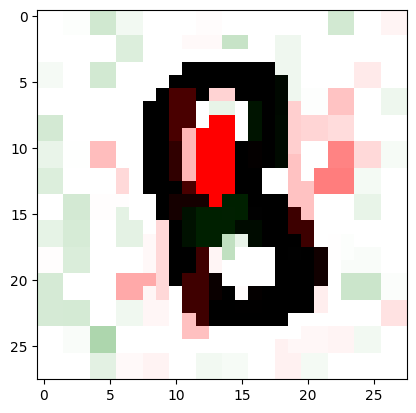

In [15]:
plt.imshow(explanation)